In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dac-public-transport-efficiency-analysis/st_week_grp.csv
/kaggle/input/dac-public-transport-efficiency-analysis/Weekly_Boarding.csv
/kaggle/input/unisys/Public Transport Boarding Summary by Route, Trip, Stop and Week of Year.doc
/kaggle/input/unisys/20140711.CSV
/kaggle/input/unisys/ptsboardingsummary/Public Transport Boarding Summary by Route, Trip, Stop and Week of Year.doc
/kaggle/input/unisys/ptsboardingsummary/20140711.CSV


In [4]:
# Step 1: Load the dataset
print("Load the dataset")
import pandas as pd
data = pd.read_csv('/kaggle/input/unisys/20140711.CSV', low_memory=False)
data.shape
data.head(10)

Load the dataset


,TripID,RouteID,StopID,StopName,WeekBeginning,NumberOfBoardings
0,23631,100,14156,181 Cross Rd,2013-06-30 00:00:00,1
1,23631,100,14144,177 Cross Rd,2013-06-30 00:00:00,1
2,23632,100,14132,175 Cross Rd,2013-06-30 00:00:00,1
3,23633,100,12266,Zone A Arndale Interchange,2013-06-30 00:00:00,2
4,23633,100,14147,178 Cross Rd,2013-06-30 00:00:00,1
5,23634,100,13907,9A Marion Rd,2013-06-30 00:00:00,1
6,23634,100,14132,175 Cross Rd,2013-06-30 00:00:00,1
7,23634,100,13335,9A Holbrooks Rd,2013-06-30 00:00:00,1
8,23634,100,13875,9 Marion Rd,2013-06-30 00:00:00,1
9,23634,100,13045,206 Holbrooks Rd,2013-06-30 00:00:00,1


In [5]:
# Step 2:  Drop duplicates and Check data types of columns
data = data.drop_duplicates()
import seaborn as sns
print(data.dtypes)

TripID                int64
RouteID              object
StopID                int64
StopName             object
WeekBeginning        object
NumberOfBoardings     int64
dtype: object


In [6]:
# Step 2: Check data types of columns
print("\nCheck data types of columns")
print(data.dtypes)



Check data types of columns
TripID                int64
RouteID              object
StopID                int64
StopName             object
WeekBeginning        object
NumberOfBoardings     int64
dtype: object


In [7]:
# Step 3: Handle mixed data types
#'RouteID' column has mixed types, convert it to numeric
data['RouteID'] = pd.to_numeric(data['RouteID'], errors='coerce')
print("Handle mixed data types")
print(data.shape)

Handle mixed data types
(10857234, 6)


In [8]:
# Step 4: Handle missing values
# Drop rows with missing values or fill them based on your project requirements
data = data.dropna()
print("\nHandle missing values")
print(data.shape)


Handle missing values
(6414906, 6)


In [9]:
# Step 5: Convert 'WeekBeginning' column to datetime format
data['WeekBeginning'] = pd.to_datetime(data['WeekBeginning'], errors='coerce')
print("\nConvert 'WeekBeginning' column to datetime format")
print(data['WeekBeginning'].head())


Convert 'WeekBeginning' column to datetime format
0   2013-06-30
1   2013-06-30
2   2013-06-30
3   2013-06-30
4   2013-06-30
Name: WeekBeginning, dtype: datetime64[ns]


In [10]:
# Step 6: Clean 'StopName' column
# Remove leading and trailing whitespaces
data['StopName'] = data['StopName'].str.strip()
print("\nClean 'StopName' column")
print(data['StopName'].head())


Clean 'StopName' column
0                  181 Cross Rd
1                  177 Cross Rd
2                  175 Cross Rd
3    Zone A Arndale Interchange
4                  178 Cross Rd
Name: StopName, dtype: object


In [11]:
data.head()

,TripID,RouteID,StopID,StopName,WeekBeginning,NumberOfBoardings
0,23631,100.0,14156,181 Cross Rd,2013-06-30,1
1,23631,100.0,14144,177 Cross Rd,2013-06-30,1
2,23632,100.0,14132,175 Cross Rd,2013-06-30,1
3,23633,100.0,12266,Zone A Arndale Interchange,2013-06-30,2
4,23633,100.0,14147,178 Cross Rd,2013-06-30,1


In [12]:
#Step 8 : Unique values for each column in the DataFrame
print(data.nunique())

TripID               23926
RouteID                323
StopID                6718
StopName              3840
WeekBeginning           54
NumberOfBoardings      381
dtype: int64


In [13]:
data.shape
data.columns
data.head(3)

,TripID,RouteID,StopID,StopName,WeekBeginning,NumberOfBoardings
0,23631,100.0,14156,181 Cross Rd,2013-06-30,1
1,23631,100.0,14144,177 Cross Rd,2013-06-30,1
2,23632,100.0,14132,175 Cross Rd,2013-06-30,1


In [14]:
#Count the number of missing value in each coloumn
data.isnull().sum()

TripID               0
RouteID              0
StopID               0
StopName             0
WeekBeginning        0
NumberOfBoardings    0
dtype: int64

In [15]:
#different type of Unique Data in the dataset
data['WeekBeginning'].unique()

<DatetimeArray>
['2013-06-30 00:00:00', '2013-07-07 00:00:00', '2013-07-14 00:00:00',
 '2013-07-21 00:00:00', '2013-07-28 00:00:00', '2013-08-04 00:00:00',
 '2013-08-11 00:00:00', '2013-08-18 00:00:00', '2013-08-25 00:00:00',
 '2013-09-01 00:00:00', '2013-09-08 00:00:00', '2013-09-15 00:00:00',
 '2013-09-22 00:00:00', '2013-09-29 00:00:00', '2013-10-06 00:00:00',
 '2013-10-13 00:00:00', '2013-10-20 00:00:00', '2013-10-27 00:00:00',
 '2013-11-03 00:00:00', '2013-11-10 00:00:00', '2013-11-17 00:00:00',
 '2013-11-24 00:00:00', '2013-12-01 00:00:00', '2013-12-08 00:00:00',
 '2013-12-15 00:00:00', '2013-12-22 00:00:00', '2013-12-29 00:00:00',
 '2014-01-05 00:00:00', '2014-01-12 00:00:00', '2014-01-19 00:00:00',
 '2014-01-26 00:00:00', '2014-02-02 00:00:00', '2014-02-09 00:00:00',
 '2014-02-16 00:00:00', '2014-02-23 00:00:00', '2014-03-02 00:00:00',
 '2014-03-09 00:00:00', '2014-03-16 00:00:00', '2014-03-23 00:00:00',
 '2014-03-30 00:00:00', '2014-04-06 00:00:00', '2014-04-13 00:00:00',
 '20

<Axes: xlabel='TripID'>

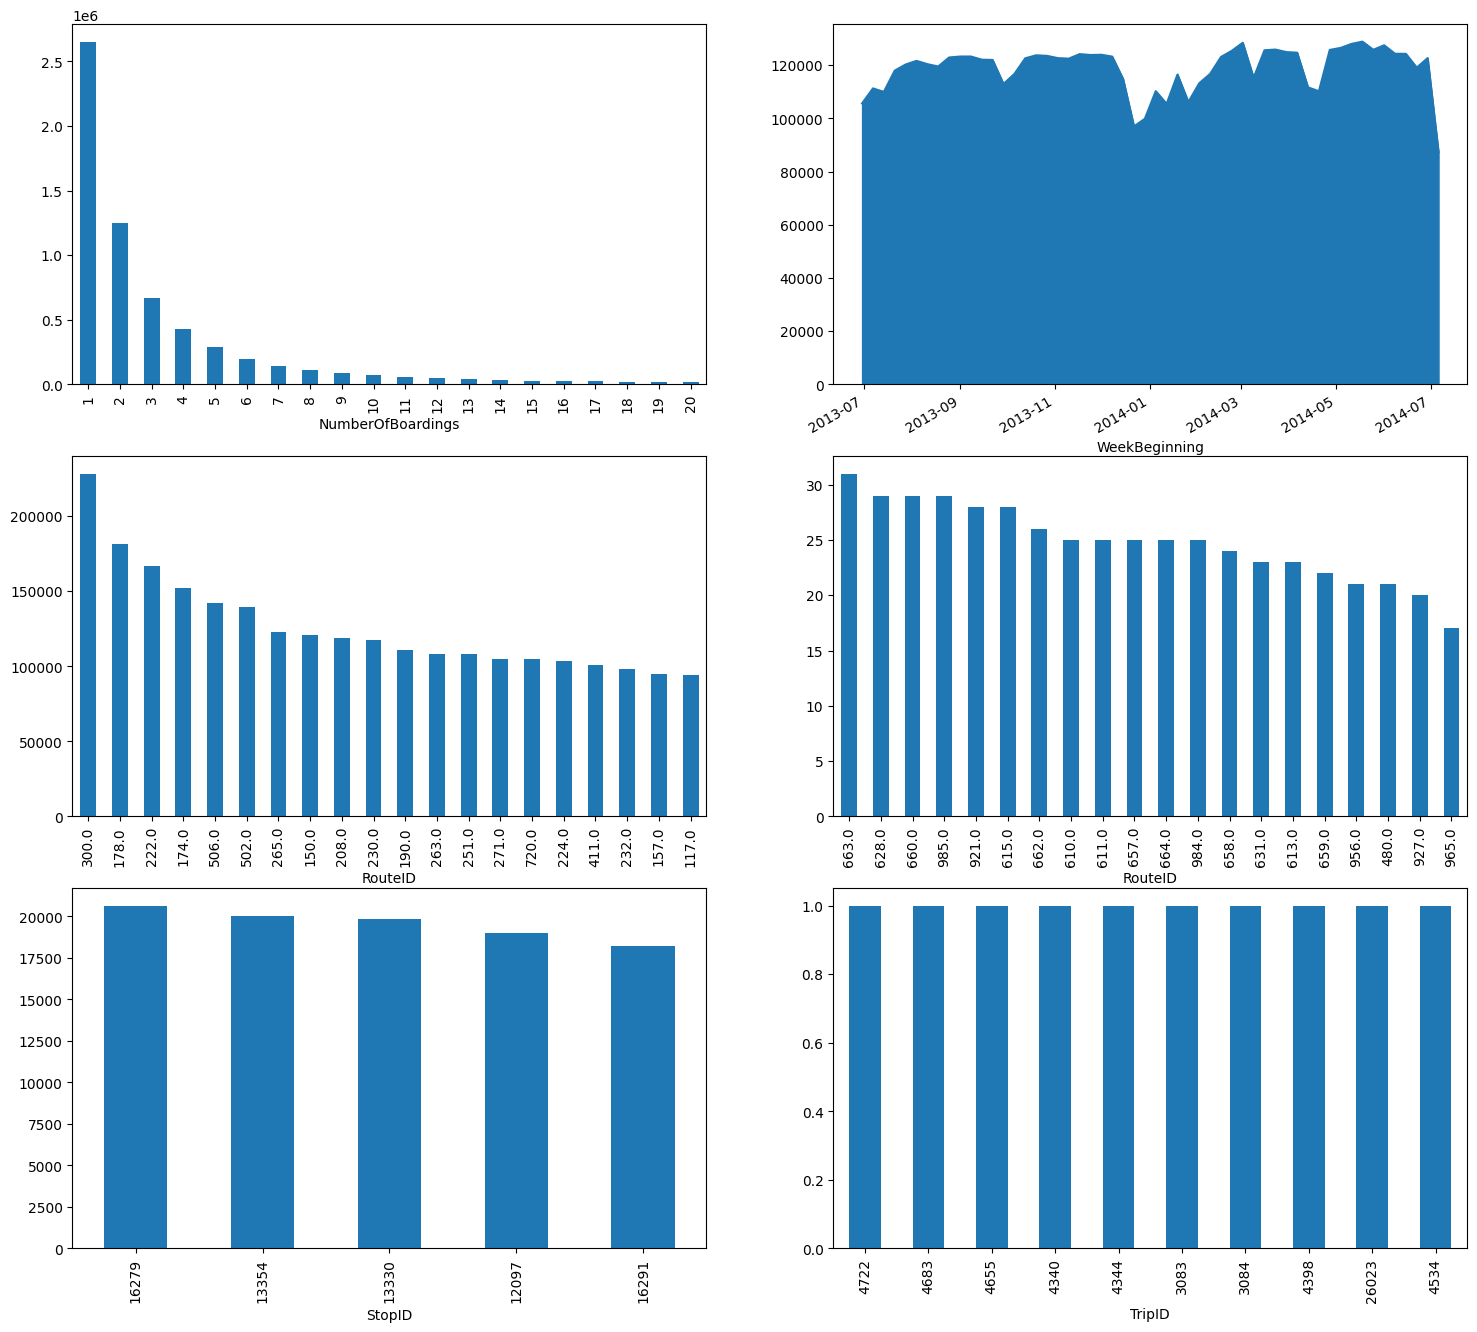

In [16]:
import matplotlib.pyplot as plt
fig,axrr=plt.subplots(3,2,figsize=(18,18))
data['NumberOfBoardings'].value_counts().sort_index().head(20).plot.bar(ax=axrr[0][0])
data['WeekBeginning'].value_counts().plot.area(ax=axrr[0][1])
data['RouteID'].value_counts().head(20).plot.bar(ax=axrr[1][0])
data['RouteID'].value_counts().tail(20).plot.bar(ax=axrr[1][1])
data['StopID'].value_counts().head(5).plot.bar(ax=axrr[2][0])
data['TripID'].value_counts().tail(10).plot.bar(ax=axrr[2][1])

In [17]:
data.head(10)

,TripID,RouteID,StopID,StopName,WeekBeginning,NumberOfBoardings
0,23631,100.0,14156,181 Cross Rd,2013-06-30,1
1,23631,100.0,14144,177 Cross Rd,2013-06-30,1
2,23632,100.0,14132,175 Cross Rd,2013-06-30,1
3,23633,100.0,12266,Zone A Arndale Interchange,2013-06-30,2
4,23633,100.0,14147,178 Cross Rd,2013-06-30,1
5,23634,100.0,13907,9A Marion Rd,2013-06-30,1
6,23634,100.0,14132,175 Cross Rd,2013-06-30,1
7,23634,100.0,13335,9A Holbrooks Rd,2013-06-30,1
8,23634,100.0,13875,9 Marion Rd,2013-06-30,1
9,23634,100.0,13045,206 Holbrooks Rd,2013-06-30,1


In [18]:
data.shape

(6414906, 6)

In [25]:
data.columns

Index(['TripID', 'RouteID', 'StopID', 'StopName', 'WeekBeginning',
       'NumberOfBoardings'],
      dtype='object')

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6414906 entries, 0 to 7770689
Data columns (total 6 columns):
 #   Column             Dtype         
---  ------             -----         
 0   TripID             int64         
 1   RouteID            float64       
 2   StopID             int64         
 3   StopName           object        
 4   WeekBeginning      datetime64[ns]
 5   NumberOfBoardings  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 342.6+ MB


In [27]:
df=data
a=df.TripID.value_counts()
a

TripID
57020    2819
57018    2741
27478    2733
57041    2718
57029    2691
         ... 
3083        1
3084        1
4398        1
26023       1
4534        1
Name: count, Length: 23926, dtype: int64

In [29]:
df.RouteID.value_counts()

RouteID
300.0    228373
178.0    181303
222.0    166623
174.0    152420
506.0    142216
          ...  
659.0        22
956.0        21
480.0        21
927.0        20
965.0        17
Name: count, Length: 323, dtype: int64

In [30]:
df.StopID.value_counts()

StopID
16279    20644
13354    20004
13330    19855
12097    18967
16291    18204
         ...  
17421        1
12798        1
12733        1
12791        1
16457        1
Name: count, Length: 6718, dtype: int64

In [31]:
df.WeekBeginning.value_counts()

WeekBeginning
2014-05-18    128858
2014-03-02    128436
2014-05-11    127997
2014-06-01    127479
2014-05-04    126495
2014-03-23    125873
2014-05-25    125794
2014-04-27    125742
2014-03-16    125616
2014-02-23    125425
2014-03-30    124927
2014-04-06    124694
2014-06-08    124297
2014-06-15    124272
2013-11-17    124161
2013-12-01    123927
2013-11-24    123831
2013-10-20    123717
2013-10-27    123512
2013-09-08    123268
2013-09-01    123252
2013-12-08    123217
2014-02-16    123091
2013-08-25    122893
2014-06-29    122665
2013-11-03    122657
2013-10-13    122593
2013-11-10    122453
2013-09-15    122068
2013-09-22    121976
2013-08-04    121625
2013-08-11    120393
2013-07-28    120250
2013-08-18    119510
2014-06-22    119075
2013-07-21    117943
2014-02-09    116727
2013-10-06    116678
2014-01-19    116500
2014-03-09    115272
2013-12-15    114795
2014-02-02    113205
2013-09-29    112947
2014-04-13    111662
2013-07-07    111277
2014-01-05    110247
2014-04-20    110215

In [32]:
df.NumberOfBoardings.value_counts()

NumberOfBoardings
1      2653854
2      1251198
3       669527
4       425683
5       286765
        ...   
367          1
567          1
483          1
290          1
449          1
Name: count, Length: 381, dtype: int64

In [33]:
data['WeekBeginning'] = pd.to_datetime(data['WeekBeginning']).dt.date
data['WeekBeginning'][1]

datetime.date(2013, 6, 30)

In [36]:
stopListName = list(st_week_grp1[st_week_grp1['WeekBeginning'] == 54]['StopName'])
stopListName[1:30]

['1 Botanic Rd',
 '1 Frome Rd',
 '1 Fullarton Rd',
 '1 George St',
 '1 Glen Osmond Rd',
 '1 Henley Beach Rd',
 '1 Kensington Rd',
 '1 King William Rd',
 '1 Port Rd',
 '1 Sir Donald Bradman Dr',
 '1 Sir Edwin Smith Av',
 '1 Unley Rd',
 '10  Holbrooks Rd',
 '10  Marion Rd',
 '10  Portrush Rd',
 '10 Anzac Hwy',
 '10 Ashley St',
 '10 Belair Rd',
 '10 Churchill Rd',
 '10 Fullarton Rd',
 '10 Glen Osmond Rd',
 '10 Greenhill Rd',
 '10 Harrow Tce',
 '10 Harvey Av',
 '10 Hawker St',
 '10 Kensington Rd',
 '10 Main North Rd',
 '10 North East Rd',
 '10 Payneham Rd']

In [37]:
stopageName_with_boarding = data.groupby(['StopName']).agg({'NumberOfBoardings': ['sum']}).reset_index()

In [38]:
stopageName_with_boarding.columns = ["stopName","Total_No_of_boardings"]
stopageName_with_boarding.head()

,stopName,Total_No_of_boardings
0,1 Anzac Hwy,23389
1,1 Bartels Rd,1
2,1 Botanic Rd,5894
3,1 Frome Rd,67458
4,1 Fullarton Rd,565


In [39]:
stopageName_with_boarding = stopageName_with_boarding.sort_values("Total_No_of_boardings", ascending = False)
#stopage with most no of boarding
stopageName_with_boarding.head(10)

,stopName,Total_No_of_boardings
3710,X2 King William St,392261
3504,D1 King William St,304767
3554,I2 North Tce,235130
3705,X1 King William St,224486
3828,Zone F Paradise Interchange,211899
3538,G3 Grenfell St,201599
3495,C3 King William St,192148
3690,W1 North Tce,189388
3515,E2 Currie St,170410
3511,E1 Currie St,165886


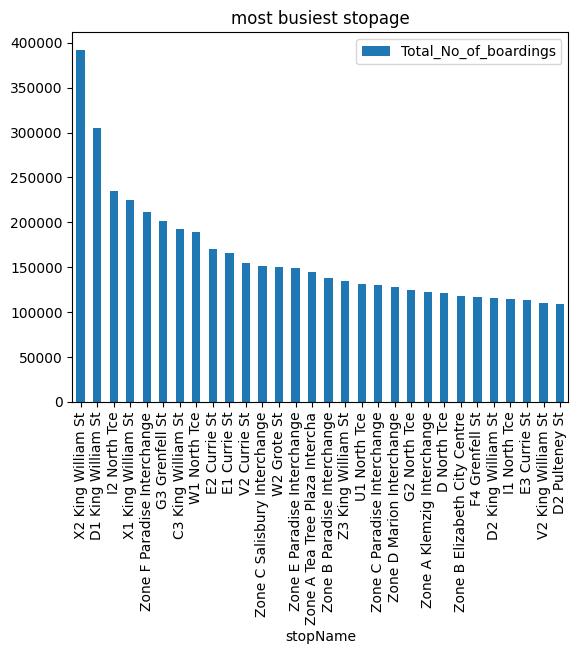

In [40]:
busiestStop = stopageName_with_boarding.head(30).plot.bar(x="stopName", y="Total_No_of_boardings", rot=90)
plt.title("most busiest stopage")
plt.legend()

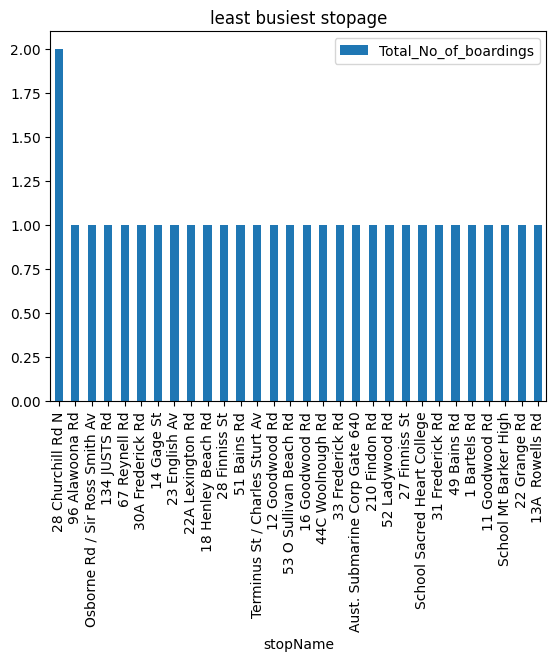

In [41]:
leastBusiestStop = stopageName_with_boarding.tail(30).plot.bar(x='stopName', y='Total_No_of_boardings', rot=90)
plt.title("least busiest stopage")
plt.legend()

<Axes: title={'center': 'least Busiest Route'}, xlabel='RouteID'>

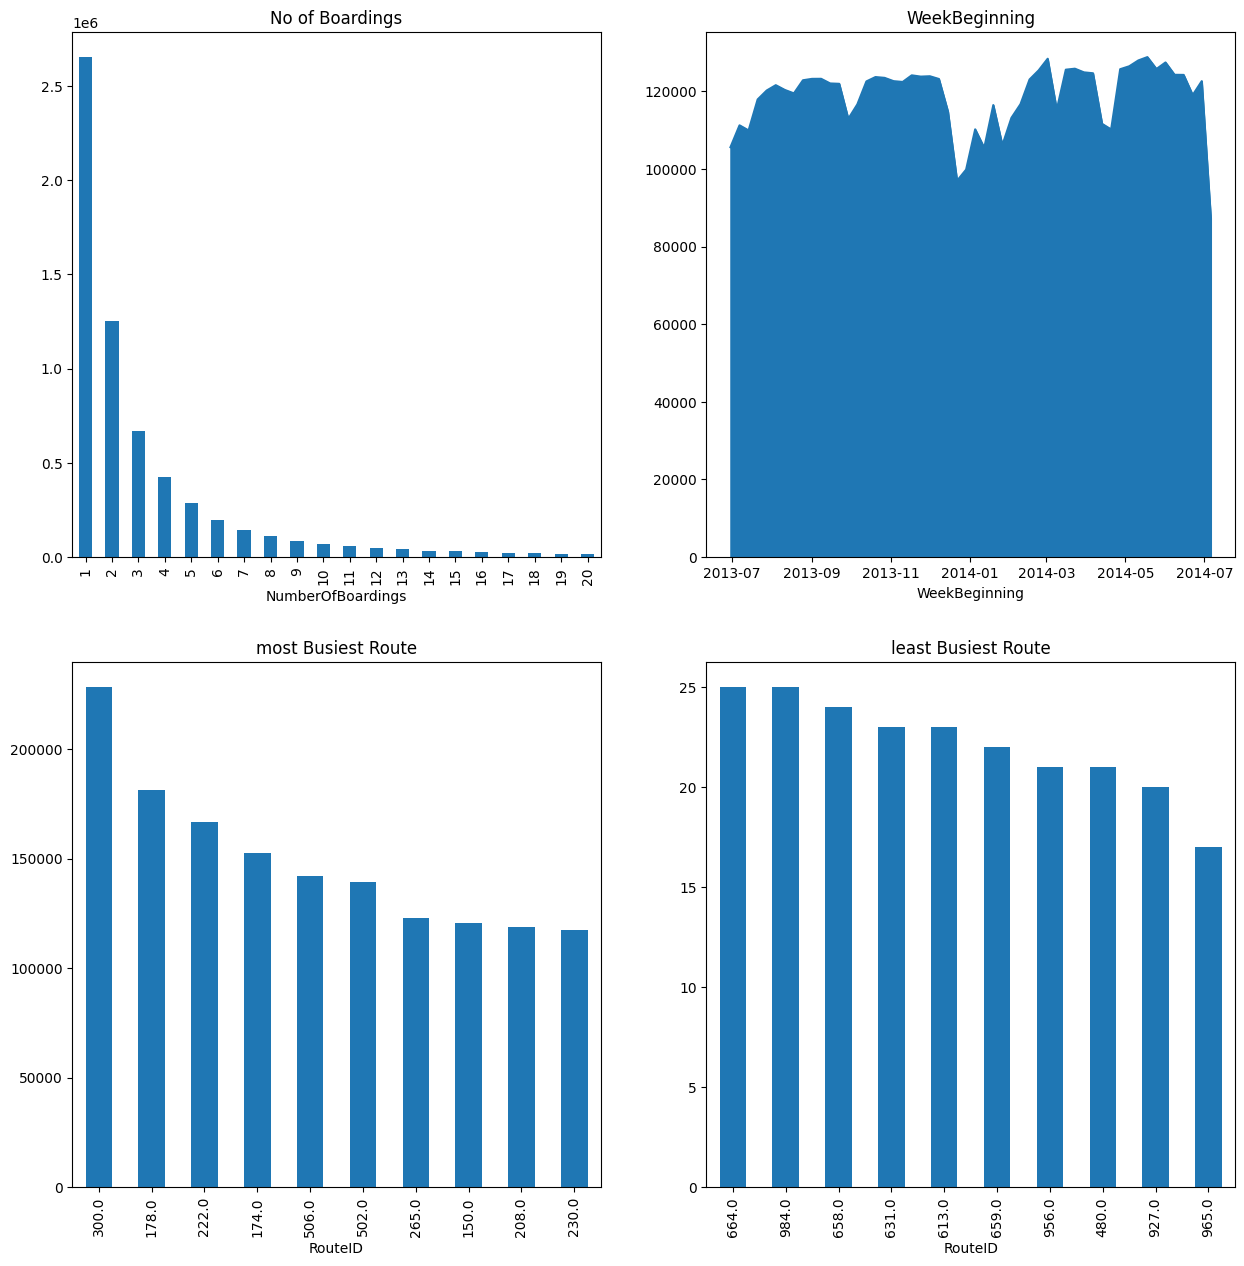

In [44]:
import matplotlib.pyplot as plt
fig,axrr=plt.subplots(2,2,figsize=(15,15))

ax=axrr[0][0]
ax.set_title("No of Boardings")
data['NumberOfBoardings'].value_counts().sort_index().head(20).plot.bar(ax=axrr[0][0])

ax=axrr[0][1]
ax.set_title("WeekBeginning")
data['WeekBeginning'].value_counts().plot.area(ax=axrr[0][1])

ax=axrr[1][0]
ax.set_title("most Busiest Route")
data['RouteID'].value_counts().head(10).plot.bar(ax=axrr[1][0])

ax=axrr[1][1]
ax.set_title("least Busiest Route")
data['RouteID'].value_counts().tail(10).plot.bar(ax=axrr[1][1])

In [45]:
data.describe()

,TripID,RouteID,StopID,NumberOfBoardings
count,6.414906e+06,6.414906e+06,6.414906e+06,6.414906e+06
mean,2.720821e+04,3.520772e+02,1.343411e+04,4.207567e+00
std,1.898503e+04,2.078052e+02,2.004087e+03,8.250148e+00
min,7.900000e+01,1.000000e+02,1.000100e+04,1.000000e+00
25%,1.111000e+04,1.900000e+02,1.206200e+04,1.000000e+00
50%,2.581800e+04,2.630000e+02,1.327500e+04,2.000000e+00
75%,4.564200e+04,5.020000e+02,1.447800e+04,4.000000e+00
max,6.551200e+04,9.960000e+02,1.871200e+04,6.480000e+02


<Axes: xlabel='TripID', ylabel='Count'>

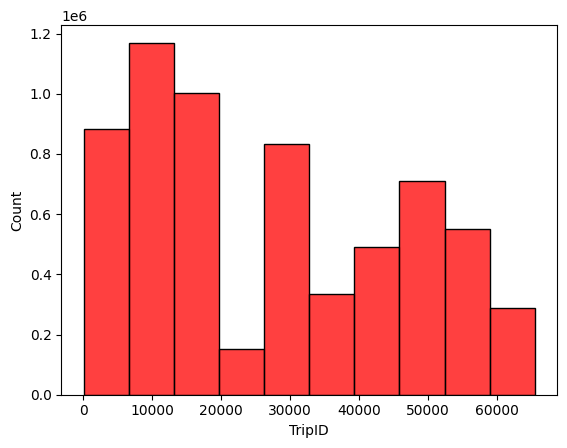

In [48]:
sns.histplot(data, x='TripID', bins=10, color='r')

<Axes: xlabel='StopID', ylabel='Count'>

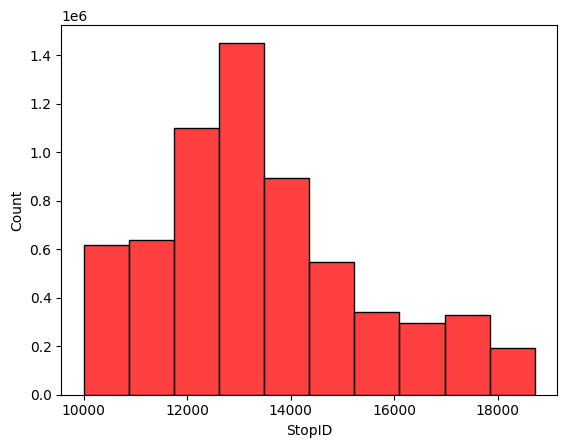

In [49]:
sns.histplot(data, x='StopID', bins=10, color='r')

In [55]:
C=data.groupby('StopName')['TripID'].sum().sort_values(ascending = False)
C

StopName
2 King William Rd     669123245
X2 King William St    550452641
I2 North Tce          529571260
13  Payneham Rd       528348051
G3 Grenfell St        510088782
                        ...    
16 Goodwood Rd             4824
13 Goodwood Rd             4824
12 Goodwood Rd             4824
96 Alawoona Rd             3428
84 Adams Rd                3426
Name: TripID, Length: 3840, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

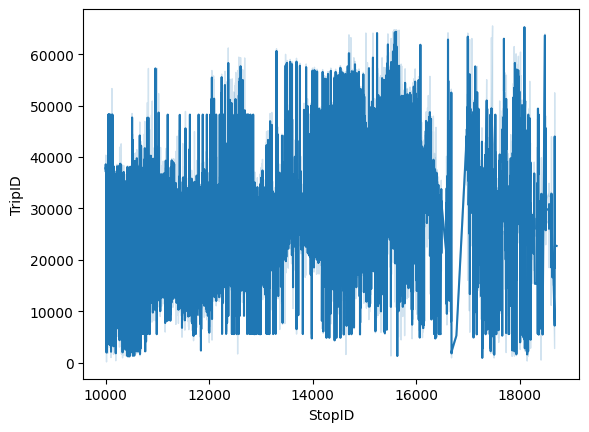

In [60]:
sns.lineplot(x="StopID", y="TripID", data=data,palette=None)
plt.show